### NYC TAXI TRIP PROJECT

### Team Group 6

* This data set is located in https://www.kaggle.com/code/parisrohan/featureengg-modelbuild-lr-dtr
* The final goal of the project is to analyze taxi duration data, within 1 month, determine the Taxi trip duration will increase by 10% on a day-by-day basis compared to the same trip distance last week.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics as stats
import matplotlib.pyplot as plt 
import statistics as stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import scipy as sp 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

In [2]:
df=pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


## Descriptive Analysis

### Number of columns and rows

In [4]:
#Number of columns and rows
print('Rows:',list(df.shape)[0])
print('Columns:',list(df.shape)[1])

Rows: 729322
Columns: 11


### Percent of missing values by Columns

In [5]:
# % of missing values by columbs
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
id,id,0.0
vendor_id,vendor_id,0.0
pickup_datetime,pickup_datetime,0.0
dropoff_datetime,dropoff_datetime,0.0
passenger_count,passenger_count,0.0
pickup_longitude,pickup_longitude,0.0
pickup_latitude,pickup_latitude,0.0
dropoff_longitude,dropoff_longitude,0.0
dropoff_latitude,dropoff_latitude,0.0
store_and_fwd_flag,store_and_fwd_flag,0.0


* There are no missing values in the dataset

### Datatype

In [6]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Categories: 

* Categorical variables: id, pickup_datetime, dropoff_datetime, store_and_fwd_flag
* Numerical variables: vendor_id, passenger_count, pickup_longitude, pickup_latitude dropoff_longitude, dropoff_latitude
* Target: trip_duration 

### Mean, Standard Deviation, Min and Max using Descriptive Statistics

In [8]:
#Summary statistics
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [9]:
#Medians of each numerical variable
pd.DataFrame(df.median()).rename(columns={0:'Median_Value'})

C:\Users\alex0\AppData\Local\Temp/ipykernel_5768/1931601074.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(df.median()).rename(columns={0:'Median_Value'})


,Median_Value
vendor_id,2.000000
passenger_count,1.000000
pickup_longitude,-73.981758
pickup_latitude,40.754070
dropoff_longitude,-73.979759
dropoff_latitude,40.754509
trip_duration,663.000000


### Mode

In [10]:
#Modes of each variable

modes = []
for i in list(df.columns):
    modes.append([i,list(df[i].mode())[0]])

df_modes = pd.DataFrame(modes).rename(columns={0:'Variable',1:'Mode'}).set_index(keys='Variable')
df_modes

,Mode
Variable,
id,id0000001
vendor_id,2
pickup_datetime,2016-01-06 09:06:01
dropoff_datetime,2016-01-15 20:27:47
passenger_count,1
pickup_longitude,-73.98214
pickup_latitude,40.774101
dropoff_longitude,-73.98233
dropoff_latitude,40.750149


### Variance

In [11]:
#Variance of each variable
variances = []
df_gpdescribe = pd.DataFrame(df.describe())
for i in df_gpdescribe.columns:
    variances.append([i,pow(list(df_gpdescribe[i])[2],2)])

df_variances = pd.DataFrame(variances).rename(columns={0:'Variable',1:'Variance'}).set_index(keys='Variable')
df_variances

,Variance
Variable,
vendor_id,2.487470e-01
passenger_count,1.722513e+00
pickup_longitude,4.865598e-03
pickup_latitude,1.128565e-03
dropoff_longitude,4.842512e-03
dropoff_latitude,1.298681e-03
trip_duration,1.493534e+07


### Correlation Matrix

In [12]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752
passenger_count,0.286463,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022
pickup_longitude,0.008198,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447
pickup_latitude,0.002861,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163
dropoff_longitude,0.002371,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664
dropoff_latitude,0.005259,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283
trip_duration,0.027752,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000


## Data cleaning and processing

### Creating a table of df type. null values and unique values for better visualization

In [13]:
def printinfo():
    temp = pd.DataFrame(index= df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] =df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp
printinfo()

,data_type,null_count,unique_count
id,object,0,729322
vendor_id,int64,0,2
pickup_datetime,object,0,709359
dropoff_datetime,object,0,709308
passenger_count,int64,0,9
pickup_longitude,float64,0,19729
pickup_latitude,float64,0,39776
dropoff_longitude,float64,0,27892
dropoff_latitude,float64,0,53579
store_and_fwd_flag,object,0,2


### Fixing dates: pickup_datetime and dropoff_datetime. Converting them into date

In [14]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [15]:
import datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [16]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [17]:
printinfo()

,data_type,null_count,unique_count
id,object,0,729322
vendor_id,int64,0,2
pickup_datetime,datetime64[ns],0,709359
dropoff_datetime,datetime64[ns],0,709308
passenger_count,int64,0,9
pickup_longitude,float64,0,19729
pickup_latitude,float64,0,39776
dropoff_longitude,float64,0,27892
dropoff_latitude,float64,0,53579
store_and_fwd_flag,object,0,2


### Extracting year, month and day from pickup_datetime and dropoff_datetime 

In [18]:
# extracting more features from the datetime variable
# For pick_up
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day']=df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
# for Drop_off
df['dropoff_year'] = df['dropoff_datetime'].dt.year
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

In [19]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2016,2,29,16,0,2016,2,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,2016,3,11,23,4,2016,3,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2016,2,21,17,6,2016,2,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,2016,1,5,9,1,2016,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2016,2,17,6,2,2016,2,17,6,2


## Dropping Numerical Variables with Zero variance

In [20]:
# Checks if there is any variables with zero variance
df.std()

C:\Users\alex0\AppData\Local\Temp/ipykernel_5768/500058482.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


vendor_id                              0.498745
pickup_datetime      51 days 13:19:45.931836372
dropoff_datetime     51 days 13:20:24.060391979
passenger_count                        1.312446
pickup_longitude                       0.069754
pickup_latitude                        0.033594
dropoff_longitude                      0.069588
dropoff_latitude                       0.036037
trip_duration                       3864.626197
pickup_year                                 0.0
pickup_month                           1.680661
pickup_day                             8.699772
pickup_hour                            6.402853
pickup_weekday                          1.95447
dropoff_year                                0.0
dropoff_month                          1.680815
dropoff_day                            8.699714
dropoff_hour                            6.48637
dropoff_weekday                        1.956866
dtype: object

* We can observe there is no numerical variable with zero variance. 

### Dropping Categorical Variables with Zero variance

In [21]:
#Variance of each variable
variances = []
df_gpdescribe = pd.DataFrame(df.describe())
for i in df_gpdescribe.columns:
    variances.append([i,pow(list(df_gpdescribe[i])[2],2)])

df_variances = pd.DataFrame(variances).rename(columns={0:'Variable',1:'Variance'}).set_index(keys='Variable')
df_variances

,Variance
Variable,
vendor_id,2.487470e-01
passenger_count,1.722513e+00
pickup_longitude,4.865598e-03
pickup_latitude,1.128565e-03
dropoff_longitude,4.842512e-03
dropoff_latitude,1.298681e-03
trip_duration,1.493534e+07
pickup_year,0.000000e+00
pickup_month,2.824621e+00


* We can observe there is no categorical variable with zero variance. 

### Remove duplicates Using Vendor Id

In [22]:
df.duplicated(subset=['id'])

0         False
1         False
2         False
3         False
4         False
          ...  
729317    False
729318    False
729319    False
729320    False
729321    False
Length: 729322, dtype: bool

In [23]:
df.drop_duplicates(subset=['id'])

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2016,2,29,16,0,2016,2,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,2016,3,11,23,4,2016,3,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2016,2,21,17,6,2016,2,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,2016,1,5,9,1,2016,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2016,2,17,6,2,2016,2,17,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,...,2016,5,21,13,5,2016,5,21,13,5
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,...,2016,2,22,0,0,2016,2,22,0,0
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,...,2016,4,15,18,4,2016,4,15,19,4
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,...,2016,6,19,9,6,2016,6,19,9,6


In [24]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,2016,2,29,16,0,2016,2,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,2016,3,11,23,4,2016,3,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,2016,2,21,17,6,2016,2,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,2016,1,5,9,1,2016,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2016,2,17,6,2,2016,2,17,6,2


In [25]:
#Number of columns and rows
print('Rows:',list(df.shape)[0])
print('Columns:',list(df.shape)[1])

Rows: 729322
Columns: 21


* We have not observe any duplicate values 

### Fixing passenger counts

In [26]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

* We have noticed that there are some trips with 0, 7 and 9 passanger cousing outliers so we have decided remove them

In [27]:
# Removing outliers
df=df[df['passenger_count']!=0]
df=df[df['passenger_count']<=6]

In [28]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

### Removing outliers in trip duration

C:\Users\alex0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


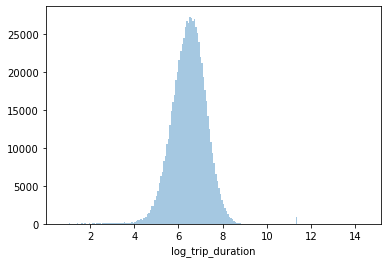

In [29]:
## Log to transform big trip duration
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = False, bins = 200)
plt.show()

In [30]:
# Remove outliers
mean = np.mean(df['trip_duration'])
print("Mean for Trip Duration is:", mean)

standard_deviation = np.std(df['trip_duration'])
print("Standard Deviation for Trip Duration is:", standard_deviation)

df = df[df['trip_duration'].between(mean - 2*standard_deviation, mean + 2*standard_deviation, inclusive = True)]
df.describe()

Mean for Trip Duration is: 952.2557593923929
Standard Deviation for Trip Duration is: 3864.7106371656687


C:\Users\alex0\AppData\Local\Temp/ipykernel_5768/2326966393.py:8: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df = df[df['trip_duration'].between(mean - 2*standard_deviation, mean + 2*standard_deviation, inclusive = True)]


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration
count,728239.000000,728239.000000,728239.000000,728239.000000,728239.000000,728239.000000,728239.000000,728239.0,728239.000000,728239.000000,728239.000000,728239.000000,728239.0,728239.000000,728239.000000,728239.000000,728239.000000,728239.000000
mean,1.534768,1.661444,-73.973520,40.750930,-73.973429,40.751781,836.481508,2016.0,3.518440,15.501999,13.612038,3.048716,2016.0,3.518732,15.502953,13.607901,3.052786,6.460387
std,0.498790,1.311669,0.069737,0.033558,0.069609,0.036025,655.421720,0.0,1.680674,8.699520,6.402444,1.954453,0.0,1.680818,8.699503,6.484751,1.956680,0.773952
min,1.000000,1.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000,2016.0,1.000000,1.000000,0.000000,0.000000,2016.0,1.000000,1.000000,0.000000,0.000000,0.693147
25%,1.000000,1.000000,-73.991859,40.737347,-73.991318,40.735935,397.000000,2016.0,2.000000,8.000000,9.000000,1.000000,2016.0,2.000000,8.000000,9.000000,1.000000,5.986452
50%,2.000000,1.000000,-73.981750,40.754082,-73.979752,40.754517,662.000000,2016.0,4.000000,15.000000,14.000000,3.000000,2016.0,4.000000,15.000000,14.000000,3.000000,6.496775
75%,2.000000,2.000000,-73.967361,40.768318,-73.963043,40.769741,1073.000000,2016.0,5.000000,23.000000,19.000000,5.000000,2016.0,5.000000,23.000000,19.000000,5.000000,6.979145
max,2.000000,6.000000,-65.897385,51.881084,-65.897385,43.921028,8588.000000,2016.0,6.000000,31.000000,23.000000,6.000000,2016.0,7.000000,31.000000,23.000000,6.000000,9.058238


In [31]:
#Getting the summary of the trip_duration dataset
df['trip_duration'].describe()/3600 # Trip duration in hours

count    202.288611
mean       0.232356
std        0.182062
min        0.000278
25%        0.110278
50%        0.183889
75%        0.298056
max        2.385556
Name: trip_duration, dtype: float64

### Transforming the boolean variable: Store_and_fwd_flag and vendor ID

In [32]:
# Data Formatting

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(lambda x: 0 if x == 'N' else 1)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(lambda x: 0 if x == 'N' else 1)

In [33]:
printinfo()

,data_type,null_count,unique_count
id,object,0,728239
vendor_id,int64,0,2
pickup_datetime,datetime64[ns],0,708326
dropoff_datetime,datetime64[ns],0,708308
passenger_count,int64,0,6
pickup_longitude,float64,0,19708
pickup_latitude,float64,0,39745
dropoff_longitude,float64,0,27870
dropoff_latitude,float64,0,53547
store_and_fwd_flag,int64,0,1


In [34]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])

In [35]:
df['vendor_id'] = enc.fit_transform(df['vendor_id'])

In [36]:
printinfo()

,data_type,null_count,unique_count
id,object,0,728239
vendor_id,int64,0,2
pickup_datetime,datetime64[ns],0,708326
dropoff_datetime,datetime64[ns],0,708308
passenger_count,int64,0,6
pickup_longitude,float64,0,19708
pickup_latitude,float64,0,39745
dropoff_longitude,float64,0,27870
dropoff_latitude,float64,0,53547
store_and_fwd_flag,int64,0,1


### 

### Dropping unwanted variables

In [37]:
df = df.drop(['id', 'pickup_datetime' , 'dropoff_datetime' ], axis =1 )
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration
0,1,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2016,2,29,16,0,2016,2,29,16,0,5.993961
1,0,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,2016,3,11,23,4,2016,3,11,23,4,7.003974
2,1,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2016,2,21,17,6,2016,2,21,18,6,7.400010
3,1,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2016,1,5,9,1,2016,1,5,10,1,7.040536
4,0,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2016,2,17,6,2,2016,2,17,6,2,6.744059


### Visualization Analysis and review

C:\Users\alex0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


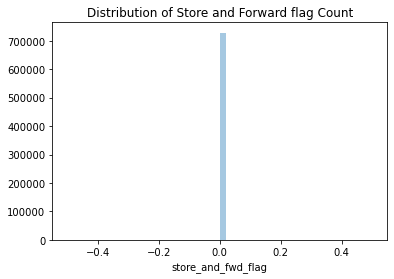

0    728239
Name: store_and_fwd_flag, dtype: int64

In [38]:
# Store and Forward Flag Distribution

sns.distplot(df['store_and_fwd_flag'],kde=False)
plt.title('Distribution of Store and Forward flag Count')
plt.show()

df['store_and_fwd_flag'].value_counts()

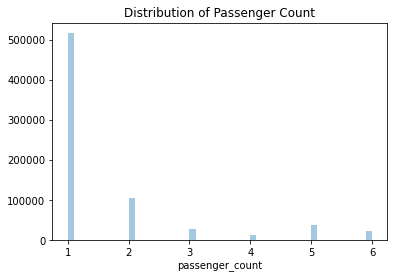

In [39]:
# Passenger Count Distribution

sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

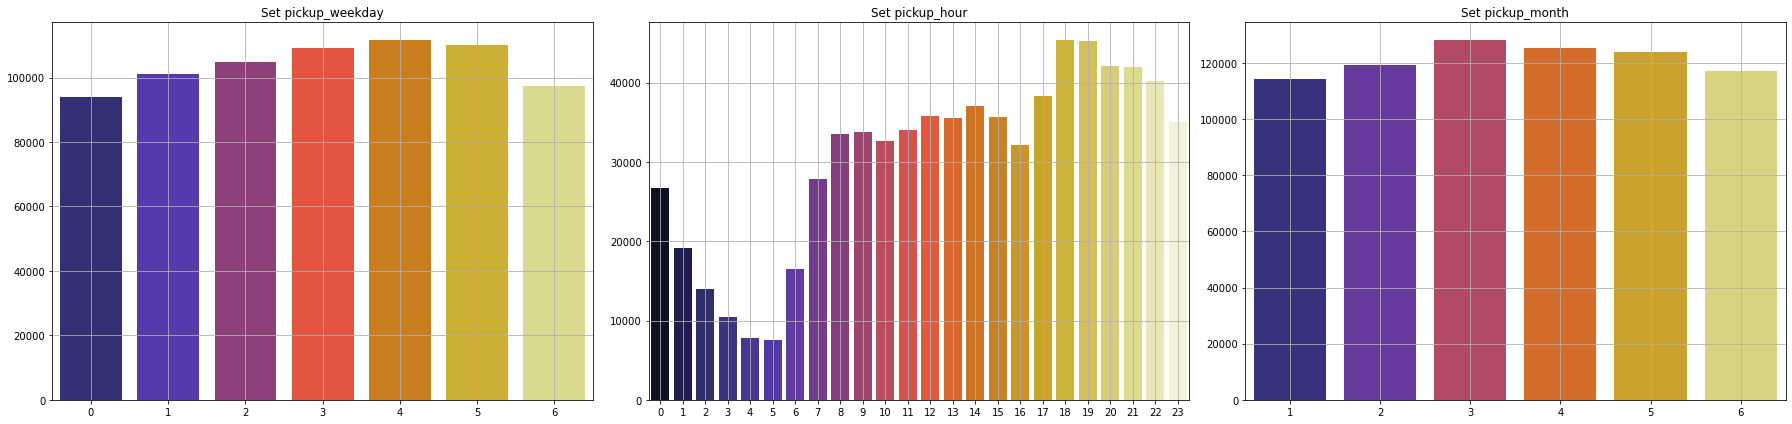

In [40]:
# Count of occurences of each pickup day, pickup hour and pickup month

fig, sub = plt.subplots(1,3,figsize=(25,6))
counter = 0

for feat, subplot in zip(["pickup_weekday","pickup_hour", "pickup_month"], sub.flatten()):
    
    if counter < 3:
        sns.barplot(x=df[feat].value_counts().index, y = df[feat].value_counts().values, ax= subplot, palette="CMRmap")
        subplot.grid()
        subplot.set_title("Set {}".format(feat))
    
    counter+=1
    
fig.tight_layout()

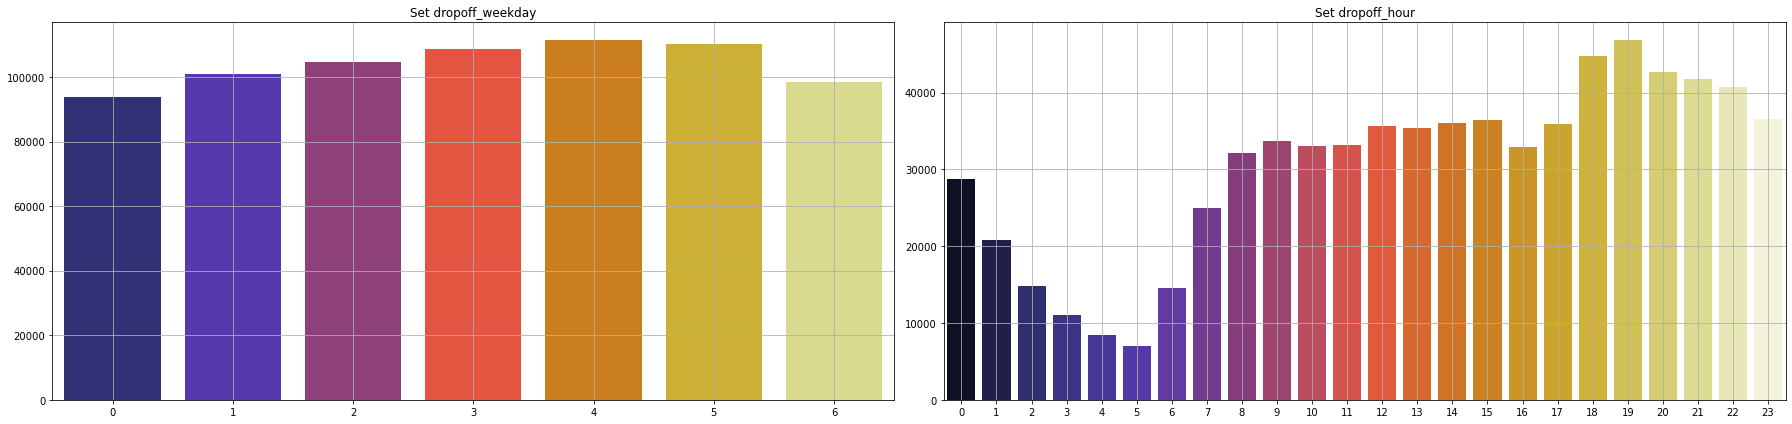

In [41]:
# Count of occurences of each dropoff weekday and dropoff hour 
# dropoff month has been excluded since the pickup month and dropoff month would be in the same month

fig, sub = plt.subplots(1,2,figsize=(25,6))
counter = 0

for feat, subplot in zip(["dropoff_weekday","dropoff_hour"], sub.flatten()):
    
    if counter < 2:
        sns.barplot(x=df[feat].value_counts().index, y = df[feat].value_counts().values, ax= subplot, palette="CMRmap")
        subplot.grid()
        subplot.set_title("Set {}".format(feat))
    
    counter+=1
    
fig.tight_layout()

[Text(0.5, 0, 'Trip duration in seconds'), Text(0, 0.5, 'Trip Count')]

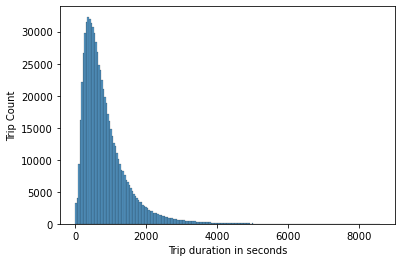

In [42]:
# Histogram to visualise counts for each Trip Duration 

graph = sns.histplot(df["trip_duration"], bins = 200)
graph.set(xlabel='Trip duration in seconds', ylabel='Trip Count')

[Text(0.5, 0, 'Trip duration in seconds (Normalised)'),
 Text(0, 0.5, 'Trip Count')]

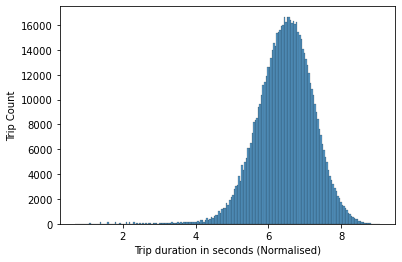

In [43]:
# Histogram to visualise counts for each Trip Duration, with logarithmic normalisation/scaling

df['trip_duration_normalised'] = np.log(df['trip_duration'].values + 1)
graph = sns.histplot(df["trip_duration_normalised"], bins = 200)
graph.set(xlabel='Trip duration in seconds (Normalised)', ylabel='Trip Count')

### Building a regression model

In [44]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration,trip_duration_normalised
0,1,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2016,2,29,16,0,2016,2,29,16,0,5.993961,5.993961
1,0,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,2016,3,11,23,4,2016,3,11,23,4,7.003974,7.003974
2,1,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2016,2,21,17,6,2016,2,21,18,6,7.400010,7.400010
3,1,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2016,1,5,9,1,2016,1,5,10,1,7.040536,7.040536
4,0,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2016,2,17,6,2,2016,2,17,6,2,6.744059,6.744059


### Drop unwanted columns

In [49]:
df.drop(['trip_duration_normalised', 'log_trip_duration'], axis = 1)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_weekday
0,1,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2016,2,29,16,0,2016,2,29,16,0
1,0,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,2016,3,11,23,4,2016,3,11,23,4
2,1,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2016,2,21,17,6,2016,2,21,18,6
3,1,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,2016,1,5,9,1,2016,1,5,10,1
4,0,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2016,2,17,6,2,2016,2,17,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,1,2,-73.965919,40.789780,-73.952637,40.789181,0,296,2016,5,21,13,5,2016,5,21,13,5
729318,0,1,-73.996666,40.737434,-74.001320,40.731911,0,315,2016,2,22,0,0,2016,2,22,0,0
729319,0,1,-73.997849,40.761696,-74.001488,40.741207,0,673,2016,4,15,18,4,2016,4,15,19,4
729320,0,1,-74.006706,40.708244,-74.013550,40.713814,0,447,2016,6,19,9,6,2016,6,19,9,6


### Normalizing the Data Sample

In [50]:
#Predictors and Target Variable

X = df.drop(['trip_duration'], axis=1)
y = np.log(df['trip_duration'])

In [51]:
# Normalising Predictors and creating new dataframe

from sklearn.preprocessing import StandardScaler

cols = X.columns

ss = StandardScaler()

new_df = ss.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_weekday,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration,trip_duration_normalised
0,0.932721,-0.504277,0.281081,0.832698,0.137258,0.538035,0.0,0.0,-0.903471,1.551581,0.372977,-1.559883,0.0,-0.903568,1.551474,0.368881,-1.560188,-0.602655,-0.602655
1,-1.072131,0.258111,-0.212106,-0.571766,-0.306308,-1.578072,0.0,0.0,-0.308472,-0.517500,1.466310,0.486727,0.0,-0.308619,-0.517611,1.448337,0.484093,0.702353,0.702353
2,0.932721,0.258111,-0.341201,-0.878236,0.364906,0.642231,0.0,0.0,-0.903471,0.631989,0.529167,1.510032,0.0,-0.903568,0.631881,0.677297,1.506233,1.214059,1.214059
3,0.932721,3.307664,0.169928,0.261932,0.239190,0.800748,0.0,0.0,-1.498471,-1.207194,-0.720356,-1.048231,0.0,-1.498517,-1.207306,-0.556367,-1.049118,0.749594,0.749594
4,-1.072131,-0.504277,-0.625211,-1.265302,-0.211939,-0.309509,0.0,0.0,-0.903471,0.172194,-1.188928,-0.536578,0.0,-0.903568,0.172084,-1.173199,-0.538048,0.366525,0.366525


### Using PCA: Principal Component Analysis 

In [52]:
X = new_df

In [54]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(df.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([1.40531064e-01, 1.30860660e-01, 1.26343842e-01, 1.21170940e-01,
       1.18443659e-01, 1.11544512e-01, 8.02958009e-02, 7.59508316e-02,
       4.45537076e-02, 3.24621974e-02, 1.33446875e-02, 4.08606439e-03,
       3.01002503e-04, 1.11026583e-04, 4.59617508e-09, 9.38372159e-34,
       2.99909888e-34, 6.22703989e-35, 3.97894011e-37])

<BarContainer object of 19 artists>

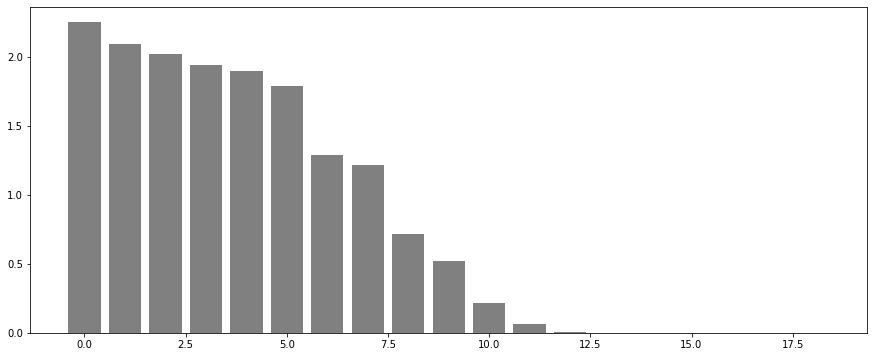

In [55]:
#Variance Ratio vs PC plot

plt.figure(figsize=(15,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="grey")

Text(0.5, 1.0, 'Elbow Plot')

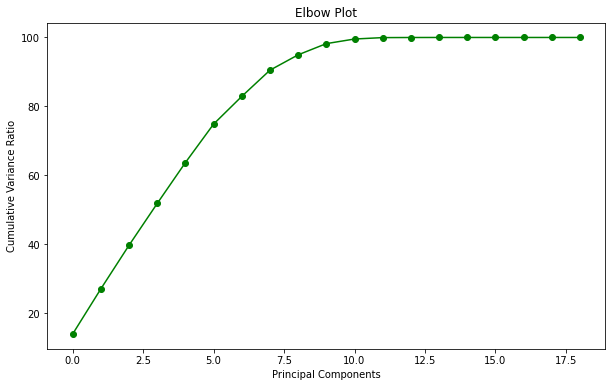

In [56]:
#Cumulative Variance Ratio

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(var_rat)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

In [57]:
#Applying PCA as per required components

pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([2.24850012, 2.09377344, 2.02150424, 1.93873771, 1.89510115,
       1.78471464, 1.28473458, 1.21521497, 0.7128603 , 0.51939587,
       0.21351529, 0.06537712])

Text(0.5, 1.0, 'Contribution of a Particular feature to our Principal Components')

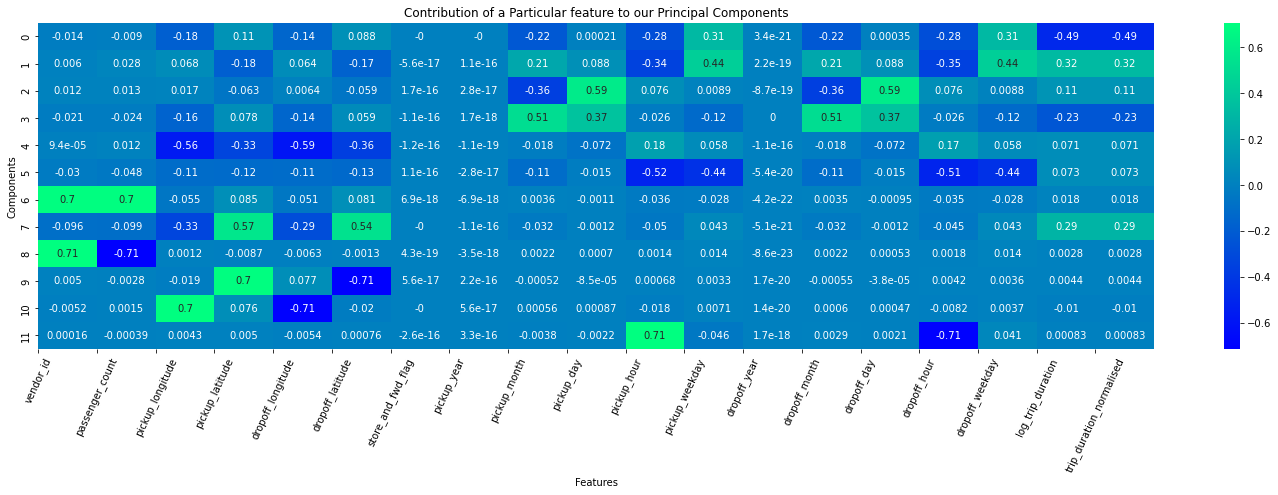

In [58]:
#importance of features in Particular Principal Component

plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="winter")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')

### Random Forest

In [60]:
#Passing in Transformed values as Predcitors

X = transform
y = np.log(df['trip_duration']).values

#importing train test split & some important metrics

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((509767, 12), (218472, 12), (509767,), (218472,))

### Linear Regression

In [62]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred


array([6.86133849, 5.37617629, 6.17830997, ..., 6.40935435, 6.32826504,
       5.78058981])

In [63]:
#coeficients & intercept

est_lr.intercept_, est_lr.coef_

(6.457927890373424,
 array([-0.37984807,  0.24902325,  0.08574202, -0.1806347 ,  0.05645956,
         0.05733309,  0.01428966,  0.22303534,  0.00225051,  0.00323342,
        -0.00844786,  0.0007676 ]))

In [64]:
#examining scores

print ("Training Score : " , est_lr.score(X_train, y_train))

print ("Validation Score : ", est_lr.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(lr_pred, y_test))

#print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.999888732956033
Validation Score :  0.9998730565639746
Cross Validation Score :  0.9998886800705536
R2_Score :  0.9998730658080152


C:\Users\alex0\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test VS Prediction')

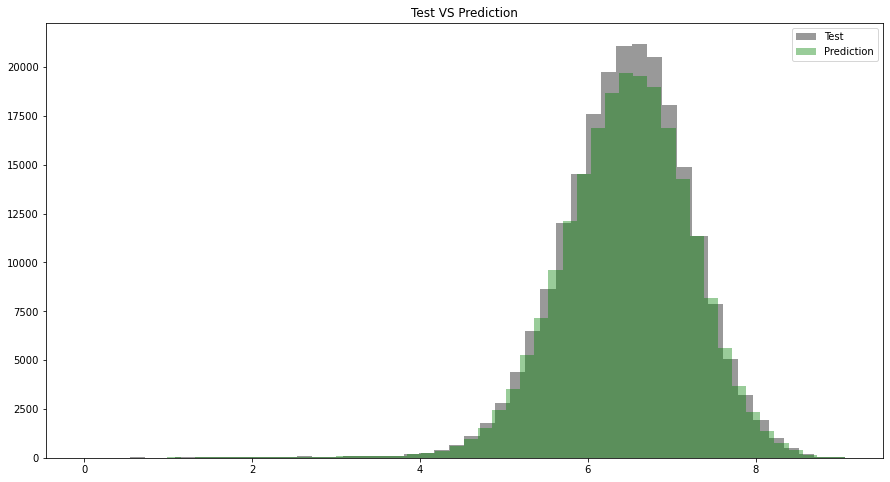

In [65]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")